In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors

from matplotlib.gridspec import GridSpec
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import plotly.express as px
%matplotlib inline

## Thủ môn

In [8]:
players = pd.read_csv('data_chua_chuan_hoa.csv') 

In [9]:
players = players[players['pos_G']==1]
players = players.drop(['pos_G', 'pos_F', 'pos_M', 'pos_D'], axis=1)
players

market_value  age  height  preferred_foot  attacking  technical  \
16              290   34     184               1          0          0   
32             1600   28     191               2          0          0   
33             1300   25     185               2          0          0   
58              435   37     192               2          0          0   
71              120   40     183               2          0          0   
...             ...  ...     ...             ...        ...        ...   
11752           160   22     180               2          0          0   
11774            55   40     185               1          0          0   
11785           130   27     180               2          0          0   
11793           115   31     172               2          0          0   
11804            52   36     174               2          0          0   

       tactical  defending  creativity  saves  anticipation  \
16           54          0           0     65            51   
32           51          0           0     59            44   
33           60          0           0     58            47   
58           65          0           0     72            52   
71           45          0           0     70            46   
...         ...        ...         ...    ...           ...   
11752        18          0           0     44            35   
11774        24          0           0     57            32   
11785        11          0           0     48            14   
11793        11          0           0     52            12   
11804        11          0           0     40            11   

       ball_distribution  aerial  avg_score_last_12_months  \
16                    62      61                      7.19   
32                    52      60                      7.10   
33                    52      63                      6.88   
58                    58      61                      7.21   
71                    57      58                      7.05   
...                  ...     ...                       ...   
11752                 44      46                      6.96   
11774                 46      54                      6.82   
11785                 48      50                      6.80   
11793                 54      50                      6.98   
11804                 51      44                      6.89   

       appearances_last_12_months  point_of_tournament  
16                             42              1858.00  
32                             32              1858.00  
33                             30              1858.00  
58                             45              1858.00  
71                             13              1858.00  
...                           ...                  ...  
11752                          15              1094.54  
11774                          18              1019.06  
11785                          22              1019.06  
11793                          20              1019.06  
11804                          25              1019.06  

[793 rows x 16 columns]

In [10]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, 16 to 11804
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   market_value                793 non-null    int64  
 1   age                         793 non-null    int64  
 2   height                      793 non-null    int64  
 3   preferred_foot              793 non-null    int64  
 4   attacking                   793 non-null    int64  
 5   technical                   793 non-null    int64  
 6   tactical                    793 non-null    int64  
 7   defending                   793 non-null    int64  
 8   creativity                  793 non-null    int64  
 9   saves                       793 non-null    int64  
 10  anticipation                793 non-null    int64  
 11  ball_distribution           793 non-null    int64  
 12  aerial                      793 non-null    int64  
 13  avg_score_last_12_months    793 non-n

In [11]:
neighbors = 32

## Hàm plot

In [12]:
def _plot_kmean_scatter(X, labels, gs, thres): 
    # lựa chọn màu sắc
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    # vẽ biểu đồ scatter
    ax = plt.subplot(gs)
    sc = ax.scatter(X[:,0], X[:,1], c=palette[labels.astype(np.int64)])

    # thêm nhãn cho mỗi cluster
    txts = []

    for i in range(num_classes):
        # Vẽ text tên cụm tại trung vị của mỗi cụm
        indices = (labels == i)
        xtext, ytext = np.median(X[indices, :], axis=0)
        if not (np.isnan(xtext) or np.isnan(ytext)):        
            txt = ax.text(xtext, ytext, str(i), fontsize=24) 
            txts.append(txt)
    plt.title('t-sne visualization for thres={:.4f}'.format(thres))

## Chuẩn hóa standard
___

In [13]:
X = players
X_std = StandardScaler().fit_transform(X) 
X_std

array([[-0.37844717,  0.96235948, -0.98862382, ...,  1.09847584,
         1.47175693,  1.49044282],
       [-0.15590743, -0.27685741,  0.44573343, ...,  0.55645274,
         0.4032746 ,  1.49044282],
       [-0.20687073, -0.89646585, -0.78371565, ..., -0.7684926 ,
         0.18957814,  1.49044282],
       ...,
       [-0.4056276 , -0.48339356, -1.80825654, ..., -1.25029091,
        -0.66520772, -2.78927298],
       [-0.40817577,  0.34275104, -3.44752197, ..., -0.16624472,
        -0.87890419, -2.78927298],
       [-0.41887806,  1.37543178, -3.03770561, ..., -0.70826782,
        -0.34466303, -2.78927298]])

Text(0.5, 1.0, 'Sorting Maximum Distance in k Nearest Neighbor of kNN')

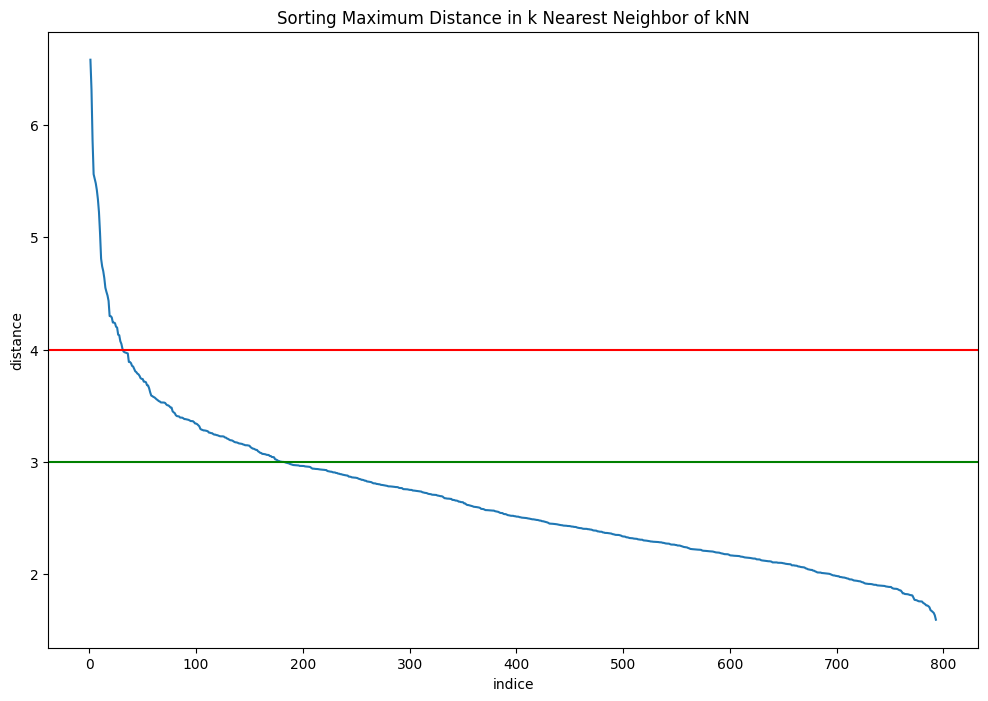

In [17]:
# X_std = X_std
# neighbors = 42
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(X_std)

# Ma trận khoảng cách distances: (N, k)
distances, indices = nbrs.kneighbors(X_std)

# Lấy ra khoảng cách xa nhất từ phạm vi láng giềng của mỗi điểm và sắp xếp theo thứ tự giảm dần.
distance_desc = sorted(distances[:, neighbors-1], reverse=True)

# Vẽ biểu đồ khoảng cách xa nhất ở trên theo thứ tự giảm dần
plt.figure(figsize=(12, 8))
plt.plot(list(range(1,len(distance_desc )+1)), distance_desc)
plt.axhline(y=4,color='red')
# plt.text(2, 0.6, 'y = 0.7',fontsize=8,)
plt.axhline(y=3, color='green')
# plt.text(2, 0.5, 'y = 0.45', fontsize=8)
plt.ylabel('distance')
plt.xlabel('indice')
plt.title('Sorting Maximum Distance in k Nearest Neighbor of kNN')

### PCA

2 2 2 2 2 2 2 2 2 2 2 2 

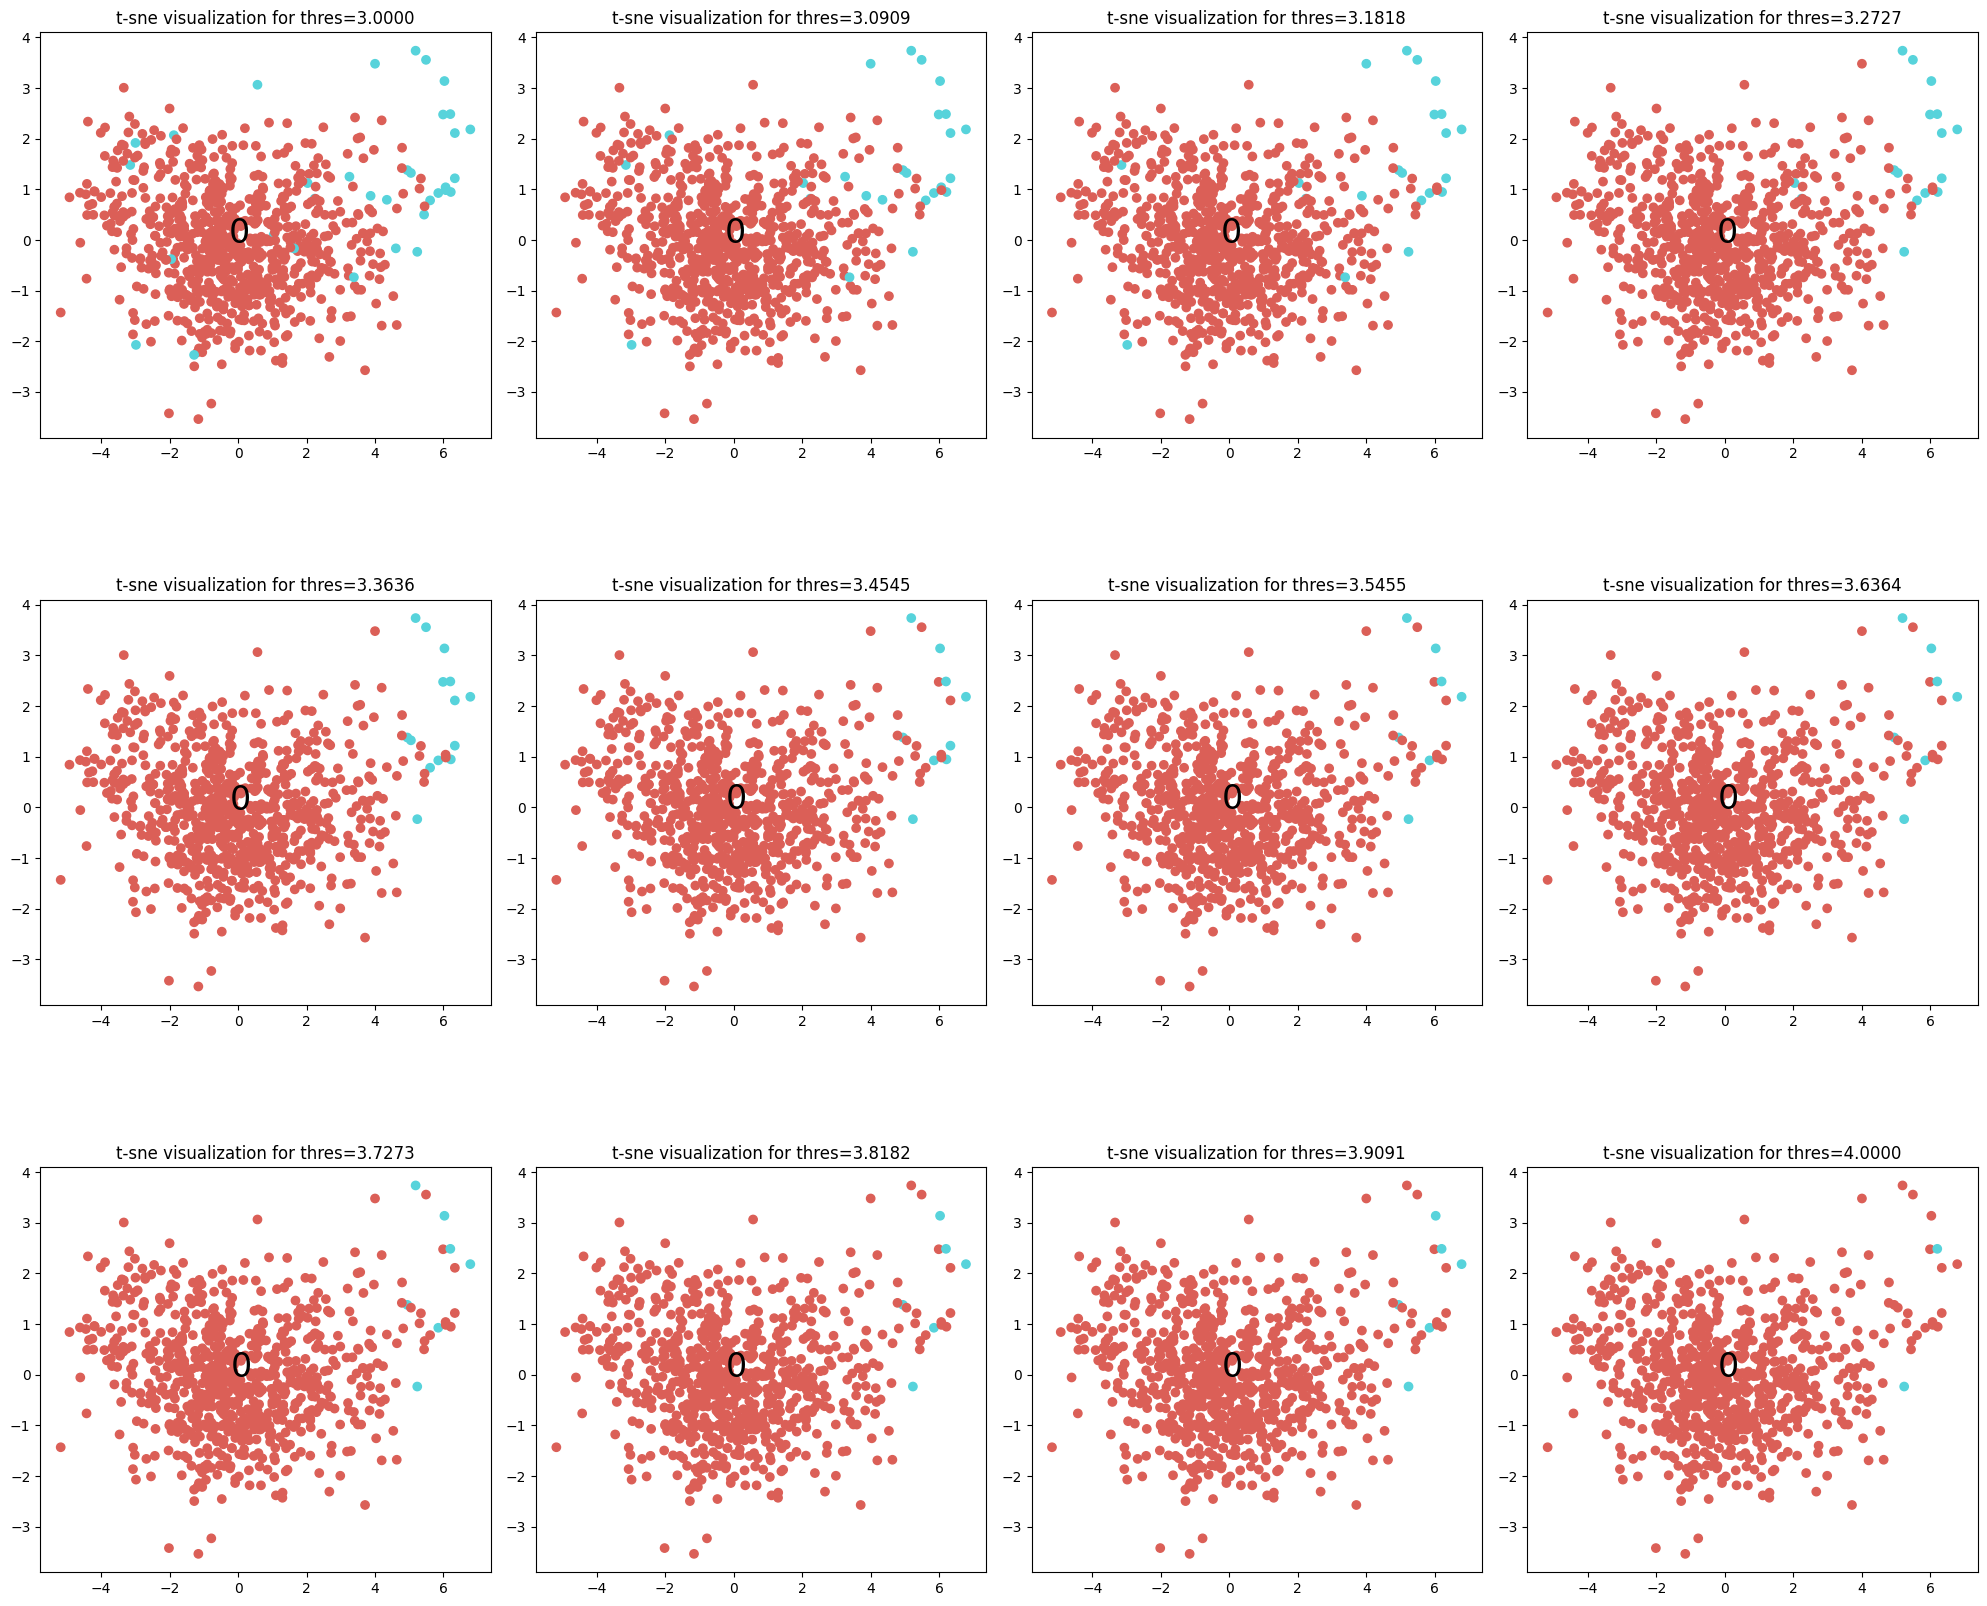

In [18]:
gs = GridSpec(3, 4) 
plt.figure(figsize = (25, 20))
plt.subplots_adjust(wspace=0.1,hspace=0.4)
# X_std = X_std_df.values
for i, thres in enumerate(np.linspace(3, 4, 12)):
    dbscan = DBSCAN(eps=thres, min_samples=neighbors+1)
    dbscan.fit(X_std)
    labels = dbscan.fit_predict(X_std) 
    print(len(np.unique(labels)),end=' ')
    pca = PCA(n_components=2).fit_transform(X_std)   
    _plot_kmean_scatter(pca , labels, gs[i], thres) 

### T-SNE

2 2 2 2 2 2 2 2 2 2 2 2 

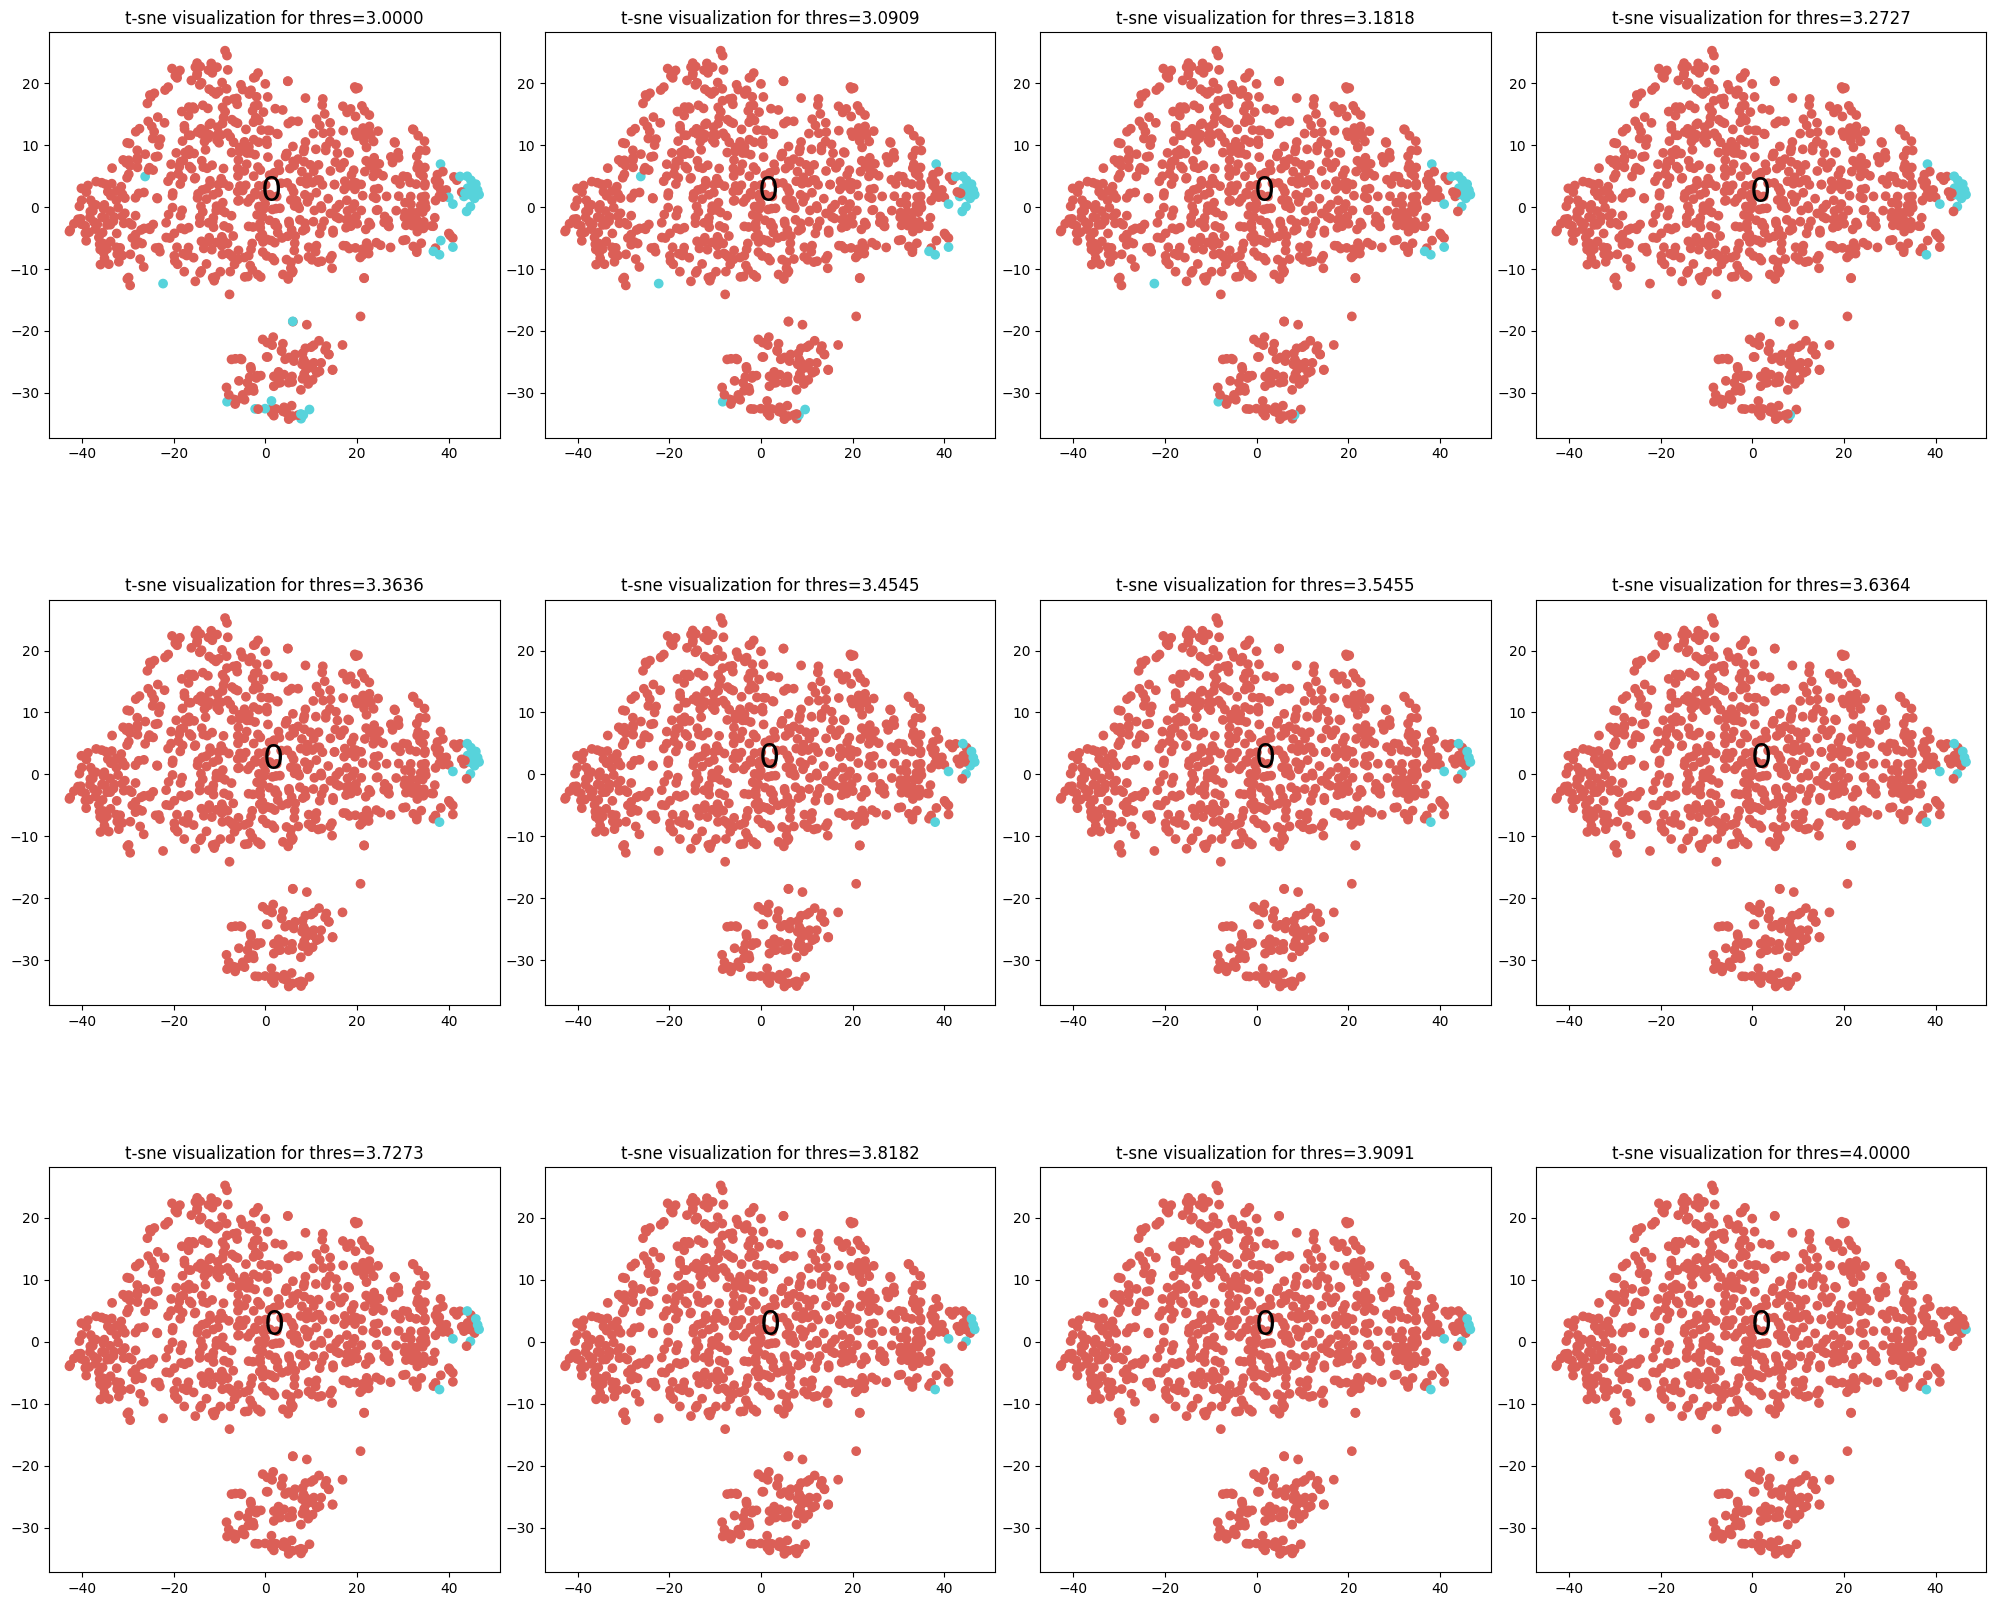

In [19]:
gs = GridSpec(3, 4) 
plt.figure(figsize = (25, 20))
plt.subplots_adjust(wspace=0.1,hspace=0.4)
# X_std = X_std_df.values
tsne = TSNE(n_components=2, random_state=42).fit_transform(X_std)  
for i, thres in enumerate(np.linspace(3, 4, 12)):
    dbscan = DBSCAN(eps=thres, min_samples=neighbors+1)
    dbscan.fit(X_std)
    labels = dbscan.fit_predict(X_std) 
    print(len(np.unique(labels)),end=' ')
    _plot_kmean_scatter(tsne , labels, gs[i], thres) 

## Chuẩn hóa minmax
___

In [20]:
X = players
X_std = MinMaxScaler().fit_transform(X) 

Text(0.5, 1.0, 'Sorting Maximum Distance in k Nearest Neighbor of kNN')

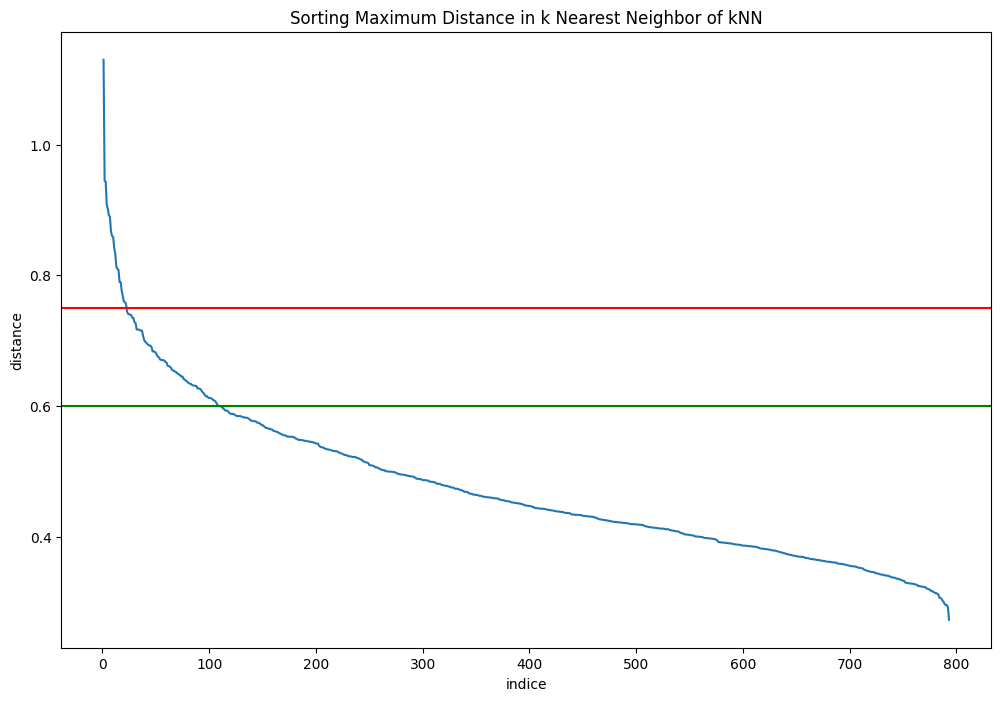

In [22]:
# X_std = X_std
# neighbors = 42
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(X_std)

# Ma trận khoảng cách distances: (N, k)
distances, indices = nbrs.kneighbors(X_std)

# Lấy ra khoảng cách xa nhất từ phạm vi láng giềng của mỗi điểm và sắp xếp theo thứ tự giảm dần.
distance_desc = sorted(distances[:, neighbors-1], reverse=True)

# Vẽ biểu đồ khoảng cách xa nhất ở trên theo thứ tự giảm dần
plt.figure(figsize=(12, 8))
plt.plot(list(range(1,len(distance_desc )+1)), distance_desc)
plt.axhline(y=0.75,color='red')
# plt.text(2, 0.6, 'y = 0.7',fontsize=8,)
plt.axhline(y=0.6, color='green')
# plt.text(2, 0.5, 'y = 0.45', fontsize=8)
plt.ylabel('distance')
plt.xlabel('indice')
plt.title('Sorting Maximum Distance in k Nearest Neighbor of kNN')

### PCA

2 2 2 2 2 2 2 2 2 2 2 2 

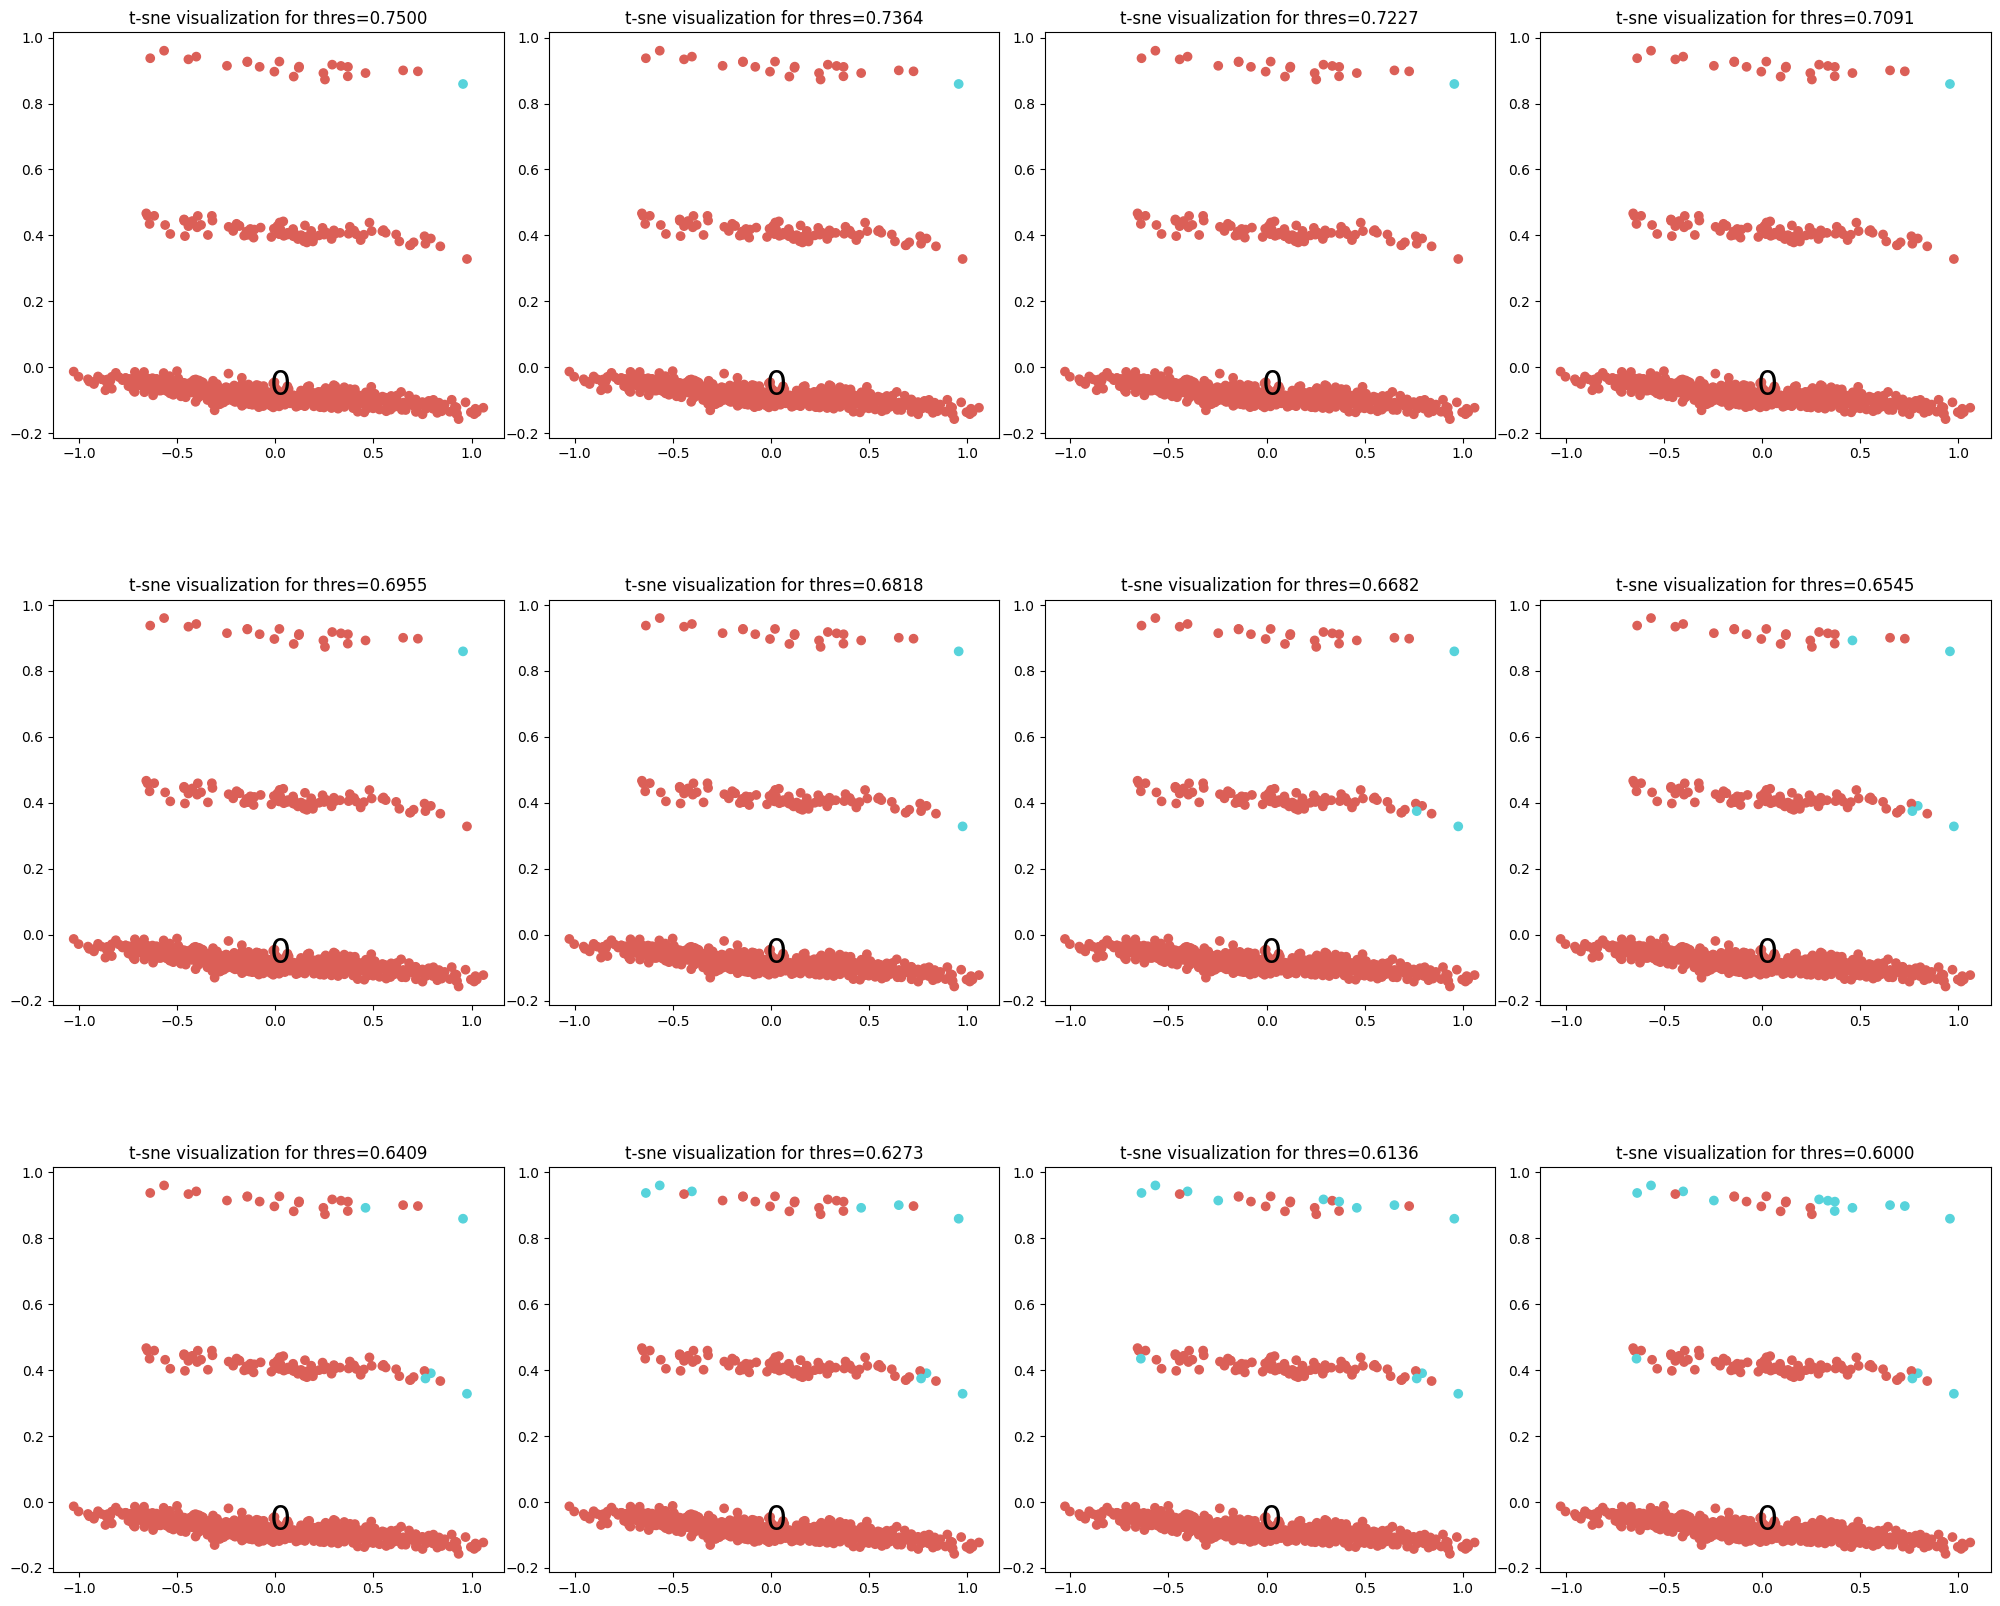

In [23]:
gs = GridSpec(3, 4) 
plt.figure(figsize = (25, 20))
plt.subplots_adjust(wspace=0.1,hspace=0.4)
# X_std = X_std_df.values
for i, thres in enumerate(np.linspace(0.75, 0.6, 12)):
    dbscan = DBSCAN(eps=thres, min_samples=neighbors+1)
    dbscan.fit(X_std)
    labels = dbscan.fit_predict(X_std) 
    print(len(np.unique(labels)),end=' ')
    pca = PCA(n_components=2).fit_transform(X_std)   
    _plot_kmean_scatter(pca , labels, gs[i], thres) 

### T-SNE

2 1 1 1 1 1 1 1 1 1 1 1 

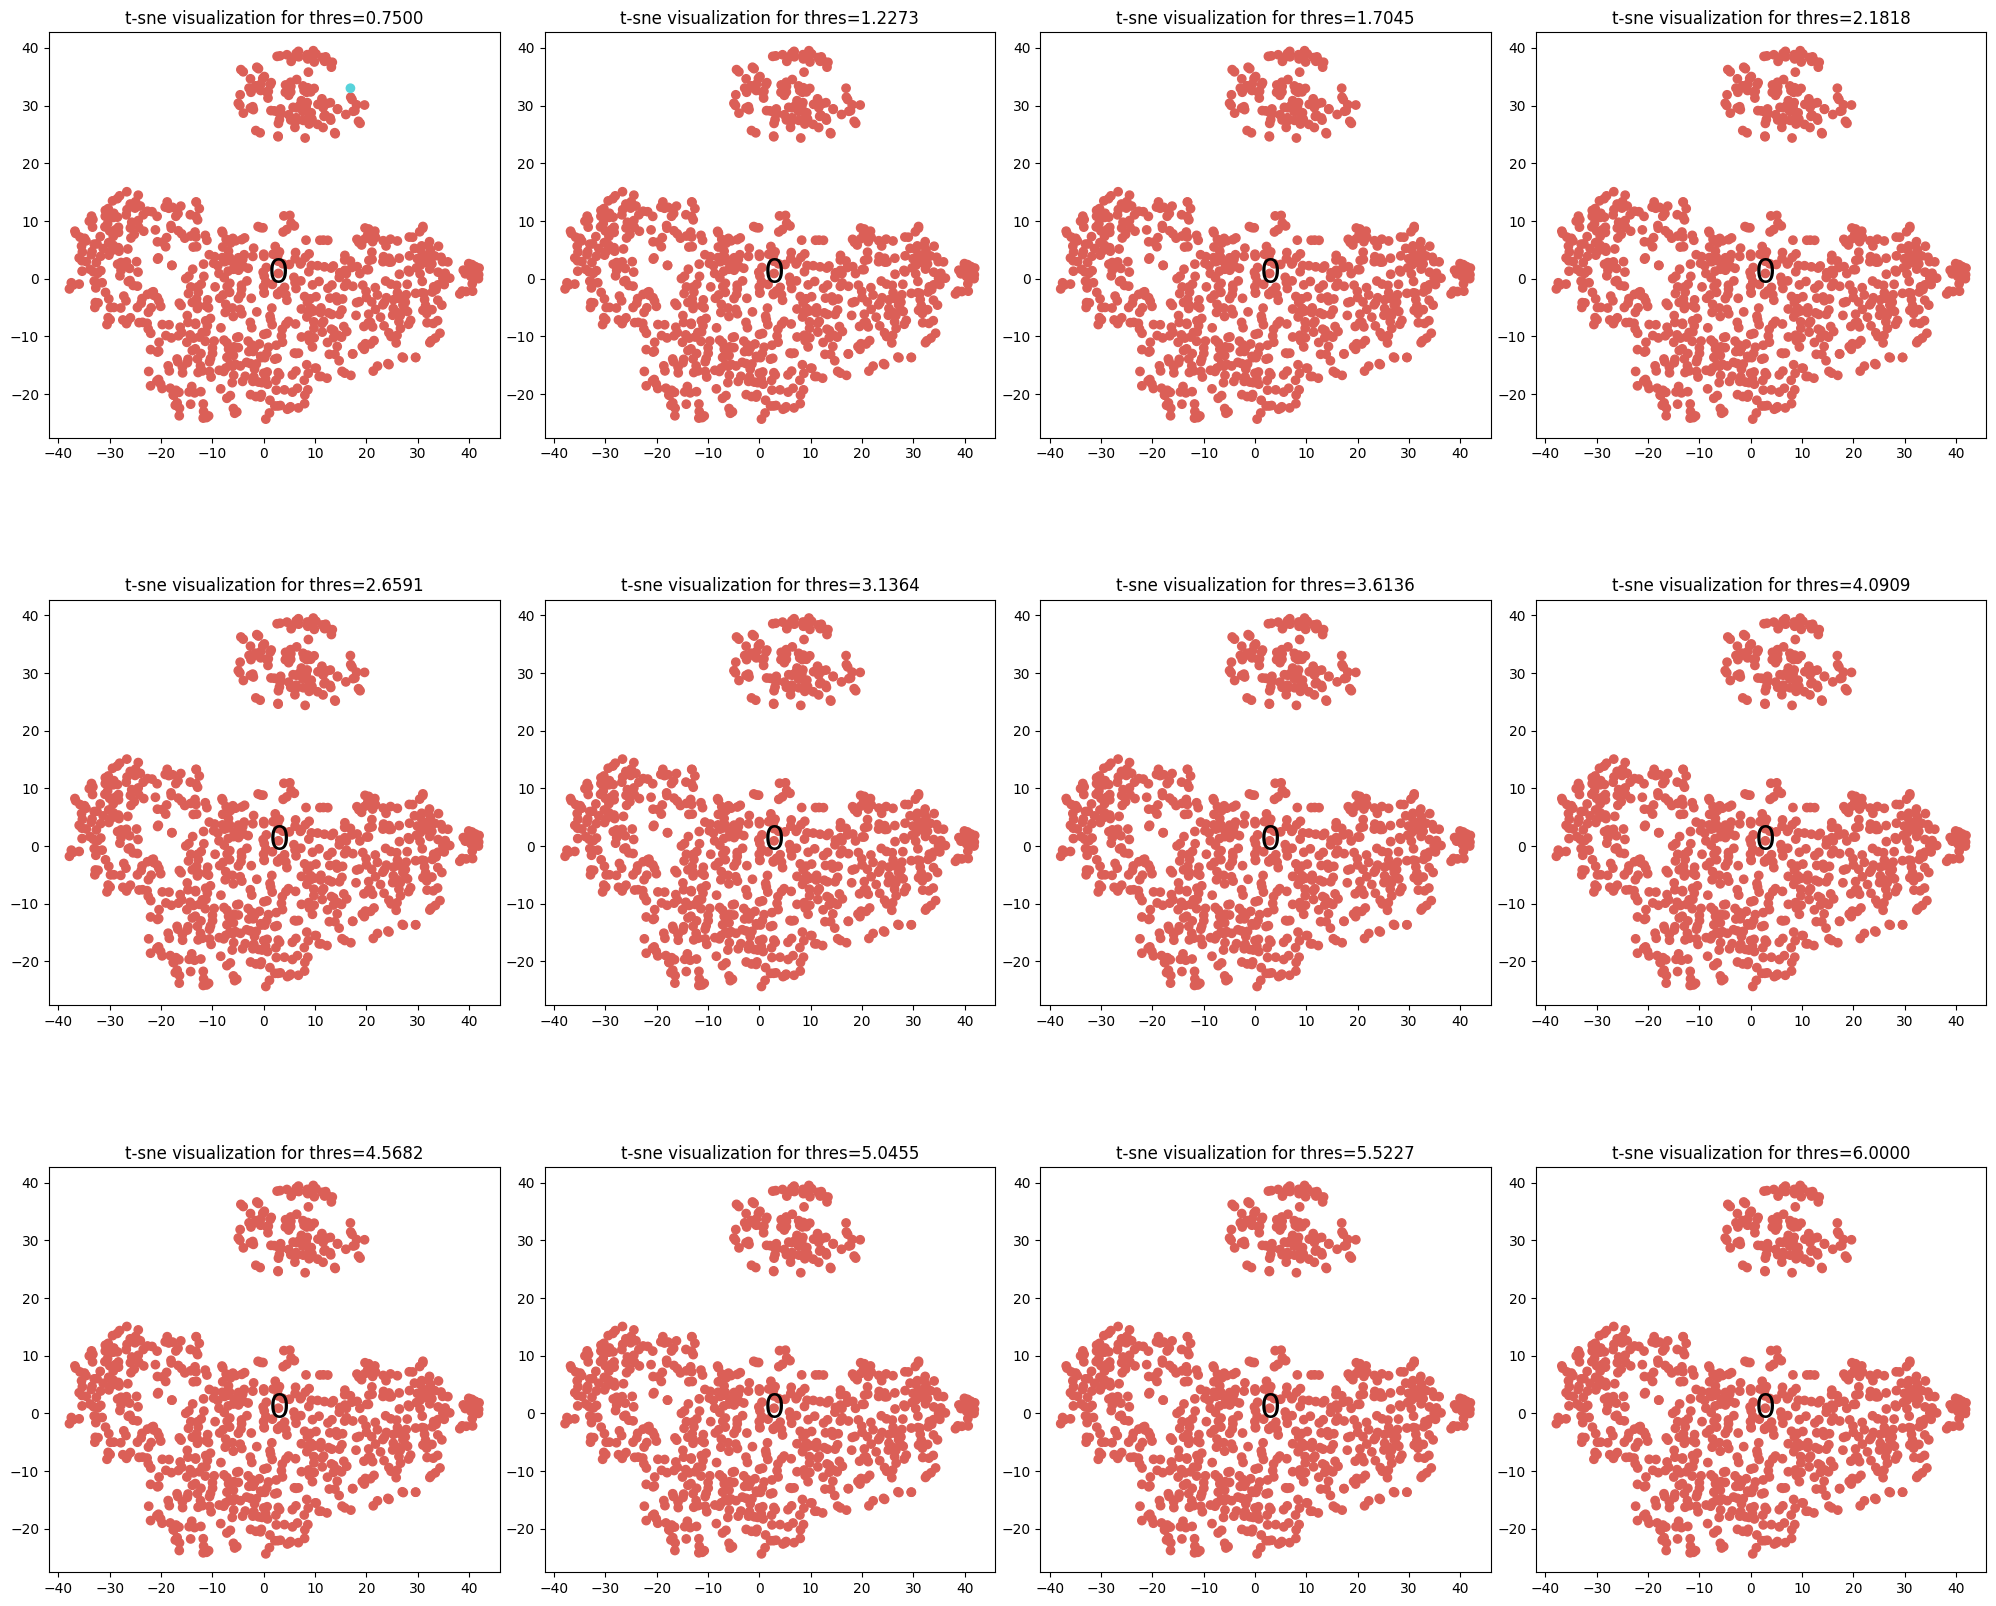

In [24]:
gs = GridSpec(3, 4) 
plt.figure(figsize = (25, 20))
plt.subplots_adjust(wspace=0.1,hspace=0.4)
# X_std = X_std_df.values
tsne = TSNE(n_components=2, random_state=42).fit_transform(X_std)  
for i, thres in enumerate(np.linspace(0.75, 6, 12)):
    dbscan = DBSCAN(eps=thres, min_samples=neighbors+1)
    dbscan.fit(X_std)
    labels = dbscan.fit_predict(X_std) 
    print(len(np.unique(labels)),end=' ')
    _plot_kmean_scatter(tsne , labels, gs[i], thres) 